Step 0: Installation (Only if needed)
If you get an error saying No module named 'networkx', run this in a separate cell first:

In [14]:
%pip install networkx matplotlib
%pip install --upgrade kaleido

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached kaleido-1.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached logistro-2.0.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached pytest_timeout-2.4.0-py3-none-any.whl.metadata (20 kB)
  Using cached simplejson-3.20.2-cp310-cp310-win_amd64.whl.metadata (3.4 kB)
  Using cached iniconfig-2.3.0-py3-none-any.whl.metadata (2.5 kB)
  Using cached pluggy-1.6.0-py3-none-any.whl.metadata (4.8 kB)
Using cached kaleido-1.2.0-py3-none-any.whl (68 kB)
Using cached logistro-2.0.1-py3-none-any.whl (8.6 kB)
Using cached pytest_timeout-2.4.0-py3-none-any.whl (14 kB)
Using cached pluggy-1.6.0-py3-none-any.whl (20 kB)
Using cached iniconfig-2.3.0-py3-none-any.whl (7.5 kB)
Using cached simplejson-3.20.2-cp310-cp310-win_amd64.whl (76 kB)

   ---------------------------------------- 0/9 [simplejson]
   ---------------------------------------- 0/9 [simplejson]
   ---------------------------------------- 0/9 [simplejso


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Cell 1: Imports

In [3]:
# --- CELL 1: IMPORTS FOR PLANNING TASK ---
import networkx as nx
import matplotlib.pyplot as plt
import os

print("Libraries for Task 2 loaded successfully.")

Libraries for Task 2 loaded successfully.


Cell 2: Workflow Definition
Here we define the steps based on the project description in the PDF (Tasks 1-11).

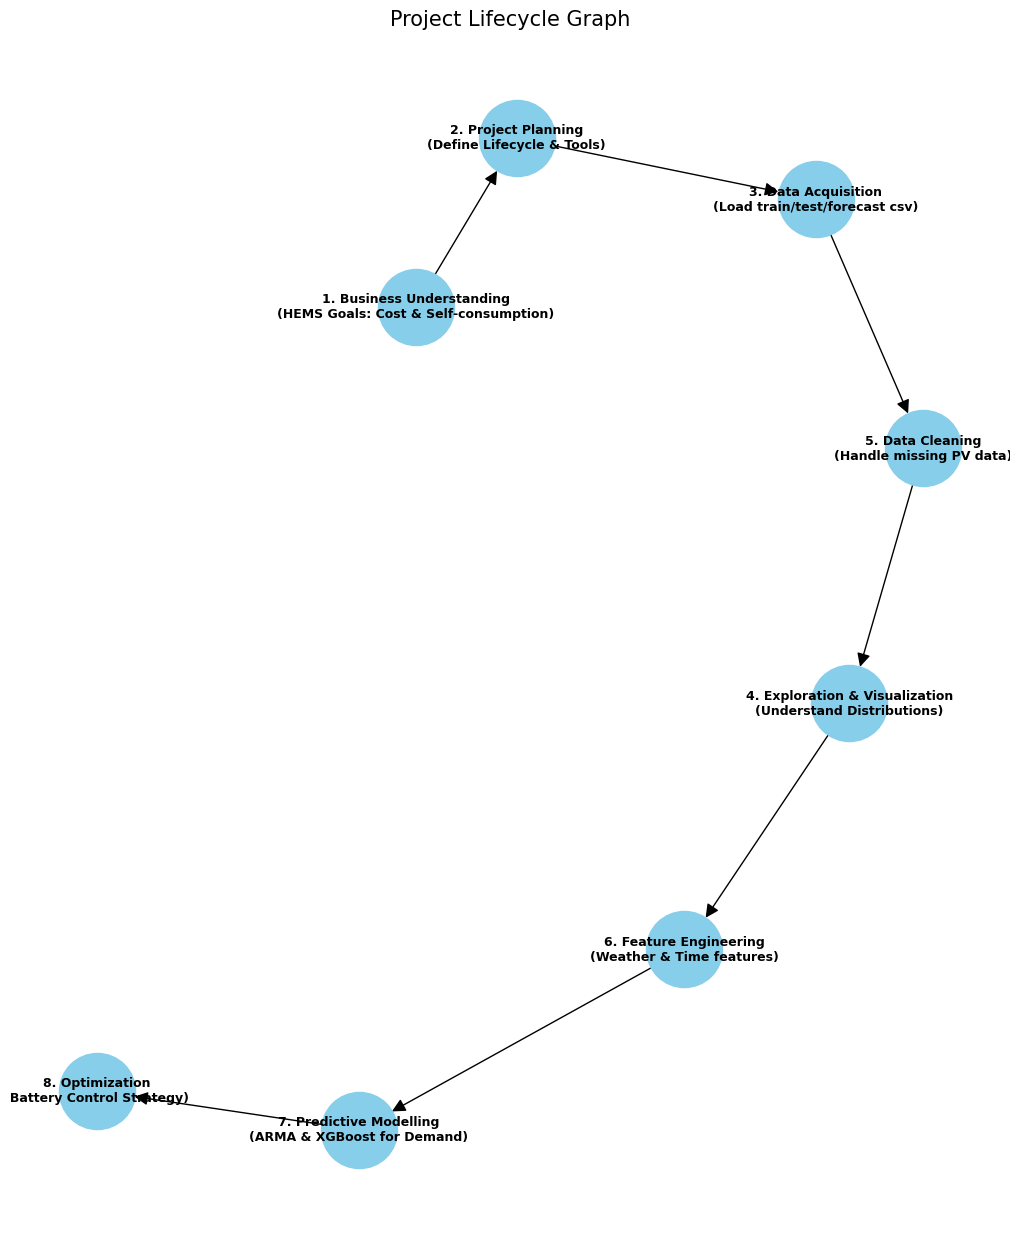

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def build_project_lifecycle_graph():
    """
    Creates a Directed Acyclic Graph (DAG) representing the HEMS project lifecycle
    based on the PDF requirements, including the Project Planning phase.
    """
    G = nx.DiGraph()
    
    # 1. Define Nodes
    steps = {
        "Start": "1. Business Understanding\n(HEMS Goals: Cost & Self-consumption)",
        "Plan":  "2. Project Planning\n(Define Lifecycle & Tools)",
        "Data":  "3. Data Acquisition\n(Load train/test/forecast csv)",
        "Viz":   "4. Exploration & Visualization\n(Understand Distributions)",
        "Clean": "5. Data Cleaning\n(Handle missing PV data)",
        "Feat":  "6. Feature Engineering\n(Weather & Time features)",
        "Model": "7. Predictive Modelling\n(ARMA & XGBoost for Demand)",
        "Opt":   "8. Optimization\n(Battery Control Strategy)"
    }
    
    # Add nodes
    G.add_nodes_from(steps.values())
    
    # 2. Define Connections (Edges)
    edges = [
        (steps["Start"], steps["Plan"]),
        (steps["Plan"],  steps["Data"]),
        (steps["Data"],  steps["Clean"]),
        (steps["Clean"], steps["Viz"]),
        (steps["Viz"],   steps["Feat"]),
        (steps["Feat"],  steps["Model"]),
        (steps["Model"], steps["Opt"])
    ]
    
    G.add_edges_from(edges)
    return G

# Generar y dibujar el grafo
G = build_project_lifecycle_graph()
plt.figure(figsize=(10, 12))
# Usamos spring_layout para intentar que se vea ordenado, aunque para flujos lineales 
# el diagrama profesional (Celda 3) suele ser más claro.
pos = nx.spring_layout(G, seed=42) 
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=9, font_weight="bold", arrowsize=20)
plt.title("Project Lifecycle Graph", fontsize=15)
plt.show()

Diagram saved successfully at: results/task2/project_lifecycle_v2.png


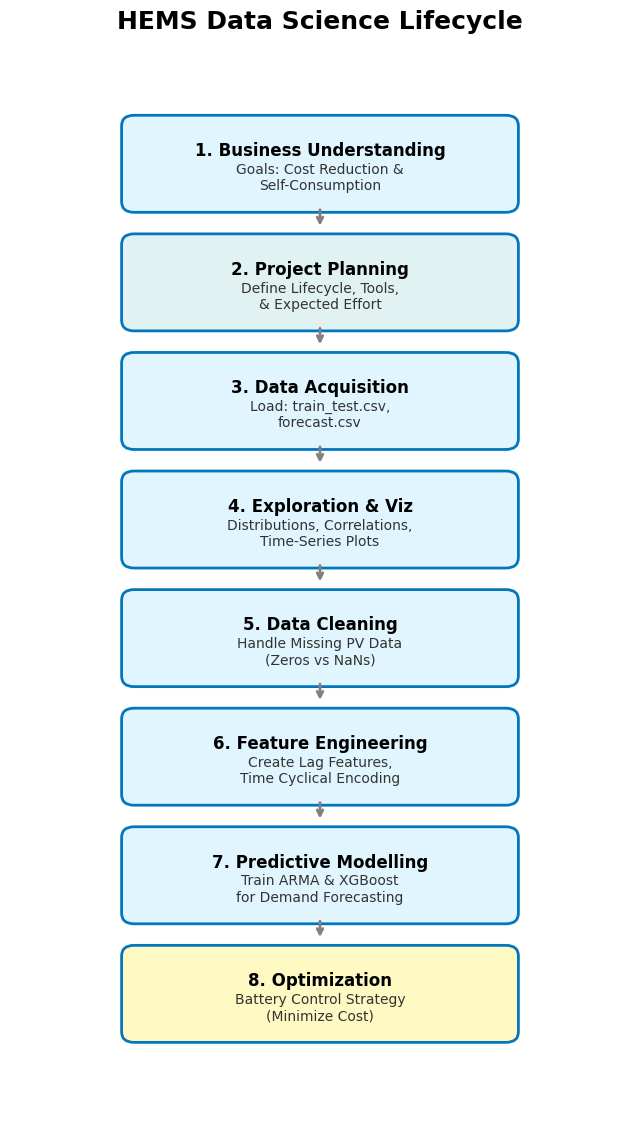

In [15]:
# --- CELL 3: PROFESSIONAL FLOWCHART (MODIFIED) ---
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

def draw_professional_flowchart(output_path='results/task2/project_lifecycle_v2.png'):
    # 1. Define steps and descriptions (Project Planning added)
    steps = [
        ("1. Business Understanding", "Goals: Cost Reduction &\nSelf-Consumption"),
        ("2. Project Planning", "Define Lifecycle, Tools,\n& Expected Effort"), 
        ("3. Data Acquisition", "Load: train_test.csv,\nforecast.csv"),
        ("4. Exploration & Viz", "Distributions, Correlations,\nTime-Series Plots"),
        ("5. Data Cleaning", "Handle Missing PV Data\n(Zeros vs NaNs)"),
        ("6. Feature Engineering", "Create Lag Features,\nTime Cyclical Encoding"),
        ("7. Predictive Modelling", "Train ARMA & XGBoost\nfor Demand Forecasting"),
        ("8. Optimization", "Battery Control Strategy\n(Minimize Cost)")
    ]

    # 2. Configure Canvas (Figure)
    # Increased height from 12 to 14 to fit the new box
    fig, ax = plt.subplots(figsize=(8, 14)) 
    ax.set_xlim(0, 10)
    ax.set_ylim(0, len(steps) * 2.5)
    ax.axis('off') # Hide axes

    # 3. Style Configuration
    box_width = 6
    box_height = 1.4
    x_center = 5
    # Start drawing from top
    start_y = len(steps) * 2.5 - 2 
    
    # Professional Colors
    box_color = '#e1f5fe'       # Very light blue
    planning_color = '#e0f2f1'  # Light teal to highlight Planning
    final_box_color = '#fff9c4' # Light yellow for the end
    border_color = '#0277bd'    # Dark blue for borders

    # 4. Loop to draw each box
    for i, (title, detail) in enumerate(steps):
        # Calculate Y position for this step
        y_pos = start_y - (i * 2.2)
        
        # Color logic: Highlight Planning and Final step
        if i == 1: # If it's the Planning step
            color = planning_color
        elif i == len(steps) - 1: # If it's the Optimization step
            color = final_box_color
        else:
            color = box_color

        # A. DRAW THE BOX (Rounded Rectangle)
        rect = patches.FancyBboxPatch(
            (x_center - box_width/2, y_pos - box_height/2), 
            box_width, box_height,
            boxstyle="round,pad=0.2", 
            linewidth=2, 
            edgecolor=border_color, 
            facecolor=color,
            mutation_scale=1
        )
        ax.add_patch(rect)

        # B. ADD TEXT
        # Title in bold
        ax.text(x_center, y_pos + 0.25, title, 
                ha='center', va='center', fontsize=12, fontweight='bold', color='black')
        
        # Detail in normal font
        ax.text(x_center, y_pos - 0.25, detail, 
                ha='center', va='center', fontsize=10, color='#333333')

        # C. DRAW ARROW (to the next box)
        if i < len(steps) - 1:
            # Arrow coordinates
            next_y_top = (start_y - ((i + 1) * 2.2)) + box_height/2 + 0.3
            curr_y_bottom = (y_pos - box_height/2) - 0.1
            
            ax.annotate('', 
                        xy=(x_center, next_y_top),       # Arrow tip
                        xytext=(x_center, curr_y_bottom), # Arrow start
                        arrowprops=dict(arrowstyle='->', lw=2, color='gray'))

    # Chart Title
    ax.set_title("HEMS Data Science Lifecycle", fontsize=18, fontweight='bold', pad=20)

    # 5. Save
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Diagram saved successfully at: {output_path}")
    plt.show()

# Run the function
draw_professional_flowchart()